<a href="https://colab.research.google.com/github/vigneshjayanth00/Football/blob/master/Data_Cleaning_Categorical_Variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
# Wilcoxon signed-rank test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import wilcoxon
import matplotlib.pyplot as plt
import seaborn as sns

#importing the libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from matplotlib import pyplot
from numpy import array
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [0]:
data=pd.read_csv(r'C:\Users\Home\Downloads\All Fifa Datasets\Updated Dataset after Cleaning\Updated1.csv')

In [0]:
#Comparing Players value and players wages
# generate two independent samples from data
data1 = data['value_eur']
data2 = data['wage_eur']
# compare samples
stat, p = wilcoxon(data1, data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=19194.000, p=0.000
Different distribution (reject H0)


In [0]:
#Encoding Ordinal Categorical Variables: Work Rate and Body Type
Dict={ 'High/Medium':2,'Medium/Low':6, 'Medium/Medium':5, 'High/High':1,
       'High/Low':3, 'Medium/High':4, 'Low/High':7, 'Low/Medium':8, 'Low/Low':9}

data['work_rate']=data['work_rate'].map(Dict)
data.work_rate.unique()

array([2, 6, 5, 1, 3, 4, 7, 8, 9], dtype=int64)

In [0]:
del data['body_type']
del data['Unnamed: 0']
del data['nationality']
del data['Year']

In [0]:
df1=pd.get_dummies(data,prefix=['PF'],columns=['preferred_foot'])
del df1['club']
del df1['team_position']
df2 = df1.drop('short_name', 1)

In [0]:
bins = [40, 50, 65, 70,75, 80,85, 90, 100]
labels=['40+','50+','65+','70+','75+','80+','85+','90+']
df1['Overall_Rating_Class'] = pd.cut(df1['overall'], bins,labels=labels).astype(str)
df1['Overall_Rating_Class']


0        90+
1        90+
2        90+
3        90+
4        90+
        ... 
97334    50+
97335    50+
97336    50+
97337    50+
97338    90+
Name: Overall_Rating_Class, Length: 97339, dtype: object

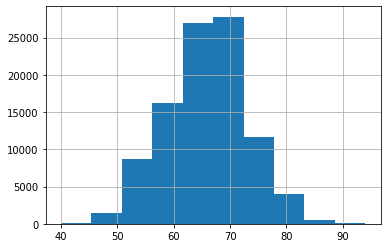

In [0]:
df1['overall'].hist()

In [0]:
#Target and Features
Names= df1['short_name'].reset_index(drop=True)
Target=df1['Overall_Rating_Class'].reset_index(drop=True)
Features=df1.drop('overall', 1).reset_index(drop=True)
del Features['short_name']
del Features['Overall_Rating_Class']


In [0]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Target)
Target1 = encoder.transform(Target)
# convert integers to dummy variables (i.e. one hot encoded)
Target1_1 = np_utils.to_categorical(Target1)

Target2=Target1_1
Features1=Features

In [0]:
###### Fitting a Neural Network ###################

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils



# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(Features1, Target2,
                                                    test_size = 0.35, random_state = 3)


# Normalize feature data
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(32, input_dim=73, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(12, activation='relu'))
    model.add(Dense(9, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
 
estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)
kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, X_test, y_test, cv=kfold)



In [0]:
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 47.20% (0.87%)


In [0]:
results

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [0]:
y_train_pred = model.predict(X_train)

In [0]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 4)                 296       
_________________________________________________________________
dense_26 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 5         
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [0]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred,multioutput='raw_values')

array([2.22612128e+15])

In [0]:
#First need to seperate midfielders, strikers and defenders

Attacking_positions=['LW','RW','ST','SUB','RS','LS','CF','RES','RF','LF']
Defensive_positions=['SUB','LCB','RCB','RB','LB','RES','CB','RWB','LWB']
Midfield_positions=['CAM','RCM','LM','SUB','LCM','RM','LDM','RDM','CDM','CM','RES','RAM','LAM']

(75534, 76)
(67478, 76)
(76237, 76)
